In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import nltk
# import spacy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix


In [2]:
df = pd.read_csv(r'C:\Users\PC\Downloads\2class_true_fake_only_2025.csv',index_col=0)
df

,Verification_Status,processed_Text,noun_count,Word_Count,entity_count,class,sum_bow
0,ข่าวปลอม,กรมพัฒนาธุรกิจการ ค้า อนุญาต ใบ ทะเบียน พาณิ...,12,17,3,1,16
1,ข่าวปลอม,"กรมการจัดหางาน ส่งเสริม ไทย เฉลี่ย 1,500...",4,19,9,1,8
2,ข่าวปลอม,ตลาด หลักทรัพย์แห่งประเทศไทย ทุน หา ค่า ข้าว...,8,22,7,1,11
3,ข่าวปลอม,ตลาดหลักทรัพย์ พอร์ต หุ้น ธนาคาร กำไร 48...,6,13,2,1,7
4,ข่าวปลอม,บริหาร ธ. ออมสินไลน์ เชิญชวน กู้ เงิน หลัก ...,7,18,2,1,13
...,...,...,...,...,...,...,...
5999,ข่าวจริง,แรงงาน ด้าว ทำ งาน 13 ก.พ. 66 อายุ ป...,9,35,6,0,13
6000,ข่าวจริง,กทม. คุม เข้ม สุ่ม ตรวจ ร้าน ค้า สถาน บริการ ...,6,13,1,0,9
6001,ข่าวจริง,ครม. อนุมัติ 12 มาตรการ แก้ ปัญหา ฝุ่น...,5,16,0,0,7
6002,ข่าวจริง,สธ. ฉีด วัคซีน บูสเตอร์ ฉีด ซิโนแวค 24 ...,11,30,18,0,8


In [3]:
class_names , _  = np.unique(df['Verification_Status'],return_inverse=True)
class_names
name = ['True_News','Fake_News']


In [4]:
df = df[['processed_Text','noun_count','Word_Count','entity_count','sum_bow','class']]
df

,processed_Text,noun_count,Word_Count,entity_count,sum_bow,class
0,กรมพัฒนาธุรกิจการ ค้า อนุญาต ใบ ทะเบียน พาณิ...,12,17,3,16,1
1,"กรมการจัดหางาน ส่งเสริม ไทย เฉลี่ย 1,500...",4,19,9,8,1
2,ตลาด หลักทรัพย์แห่งประเทศไทย ทุน หา ค่า ข้าว...,8,22,7,11,1
3,ตลาดหลักทรัพย์ พอร์ต หุ้น ธนาคาร กำไร 48...,6,13,2,7,1
4,บริหาร ธ. ออมสินไลน์ เชิญชวน กู้ เงิน หลัก ...,7,18,2,13,1
...,...,...,...,...,...,...
5999,แรงงาน ด้าว ทำ งาน 13 ก.พ. 66 อายุ ป...,9,35,6,13,0
6000,กทม. คุม เข้ม สุ่ม ตรวจ ร้าน ค้า สถาน บริการ ...,6,13,1,9,0
6001,ครม. อนุมัติ 12 มาตรการ แก้ ปัญหา ฝุ่น...,5,16,0,7,0
6002,สธ. ฉีด วัคซีน บูสเตอร์ ฉีด ซิโนแวค 24 ...,11,30,18,8,0


In [5]:

from gensim.models import Word2Vec , FastText
from gensim.models import KeyedVectors
docs = df['processed_Text'].apply(lambda x: x.split())  # แปลงเป็น list ของ list


In [6]:
w2v_model = KeyedVectors.load_word2vec_format('E:\Thesis_git\WEB-Thai-Fake-News-Detection-with-LLM-Integration\Model_Development\DL_model\gensim_fasttext_3000_vec300_e500_mc1.bin', binary=False)


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\PC\AppData\Local\Temp\ipykernel_28948\2086664426.py:1: SyntaxWarning: invalid escape sequence '\T'
  w2v_model = KeyedVectors.load_word2vec_format('E:\Thesis_git\WEB-Thai-Fake-News-Detection-with-LLM-Integration\Model_Development\DL_model\gensim_fasttext_3000_vec300_e500_mc1.bin', binary=False)


In [7]:
import numpy as np

# ฟังก์ชันแปลงคำเป็นเวกเตอร์จากโมเดล
def get_word2vec_embedding(text, model, vector_size=300):
    # แปลงแต่ละคำในข้อความเป็นเวกเตอร์
    vec = np.zeros((vector_size,))
    count = 0
    for word in text.split():
        if word in model:
            vec += model[word]
            count += 1
    # หากมีคำในข้อความที่ไม่อยู่ใน vocab จะคำนวณค่าเฉลี่ยของเวกเตอร์
    if count > 0:
        vec /= count
    return vec

# สร้างเวกเตอร์สำหรับแต่ละข้อความ
X_vectors = np.array([get_word2vec_embedding(text, w2v_model) for text in df['processed_Text']])


In [8]:
X_vectors = X_vectors.reshape(X_vectors.shape[0], 1, X_vectors.shape[1])
print(X_vectors.shape)  # (จำนวนตัวอย่าง, 1, 1000)


(6004, 1, 300)


In [9]:
# รวมเวกเตอร์จาก word2vec กับฟีเจอร์เชิงตัวเลขอื่นๆ
numeric_features_3D = df[['noun_count', 'Word_Count', 'entity_count', 'sum_bow']].values.reshape(-1, 1, 4)
X_combined = np.concatenate([X_vectors, numeric_features_3D], axis=-1)
X_combined.shape

(6004, 1, 304)

In [10]:
y = df['class']
y

0       1
1       1
2       1
3       1
4       1
       ..
5999    0
6000    0
6001    0
6002    0
6003    0
Name: class, Length: 6004, dtype: int64

In [11]:
y_onehot = to_categorical(y, num_classes=2)
print("One-Hot encoded y_train:", y_onehot[:10])  # ดูตัวอย่าง
print("Classes in y_train_onehot:", np.argmax(y_onehot, axis=1))

One-Hot encoded y_train: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Classes in y_train_onehot: [1 1 1 ... 0 0 0]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_onehot, test_size=0.2, random_state=42)
X_train.shape , y_train.shape

((4803, 1, 304), (4803, 2))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1, 304)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 1, 128)    │    221,696 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1, 128)    │        512 │ lstm[0][0]        │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1, 128)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 1, 128)    │    131,584 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 128)    │        512 │ lstm_1[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1, 128)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 1, 128)    │    131,584 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 128)    │        512 │ lstm_2[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1, 128)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 128)       │    131,584 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ lstm_3[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 128)    │          0 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 128)    │    263,808 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 128)    │        512 │ multi_head_atten… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 891,458 (3.40 MB)

 Trainable params: 890,050 (3.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.6042 - loss: 5.4690 - val_accuracy: 0.5196 - val_loss: 4.9424 - learning_rate: 5.0000e-04
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7410 - loss: 4.7528 - val_accuracy: 0.5196 - val_loss: 4.5567 - learning_rate: 5.0000e-04
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7966 - loss: 4.2898 - val_accuracy: 0.5196 - val_loss: 4.2001 - learning_rate: 5.0000e-04
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8168 - loss: 3.8330 - val_accuracy: 0.5196 - val_loss: 3.8879 - learning_rate: 5.0000e-04
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8365 - loss: 3.5227 - val_accuracy: 0.5196 - val_loss: 3.6237 - learning_rate: 5.0000e-04
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8568 - loss: 3.2234 - val_accuracy: 0.5196 - val_loss: 3.3925 - learning_rate: 5.0000e-04
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 

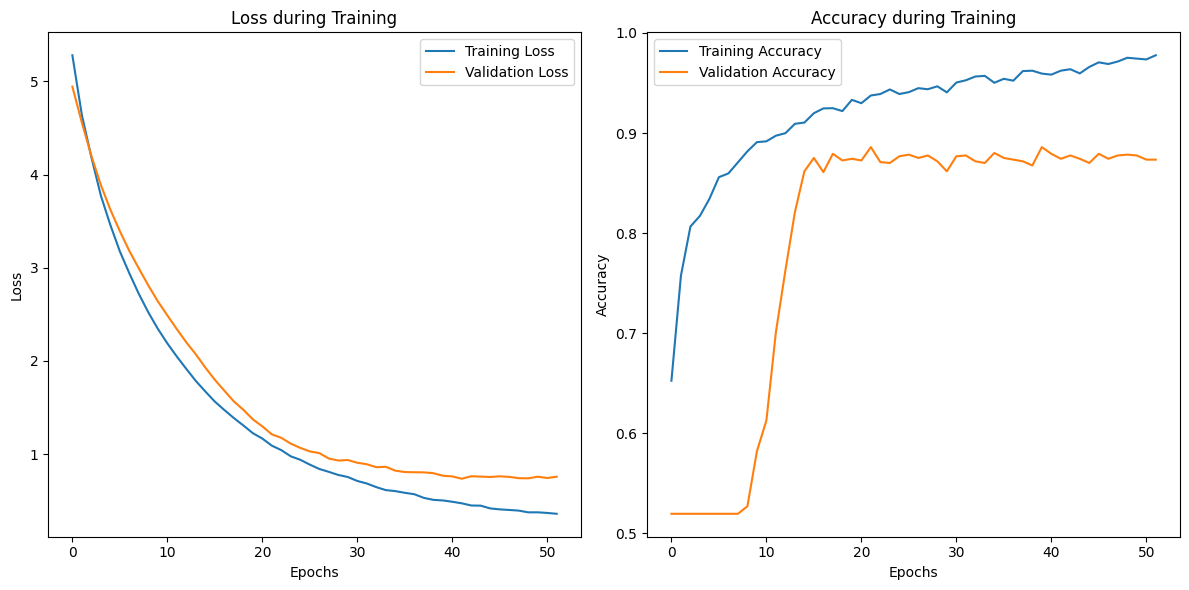

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, Dropout, Dense, BatchNormalization, 
                                     MultiHeadAttention, Reshape, GlobalAveragePooling1D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Best parameters
params = {
    'num_lstm_layers': 4,
    'lstm_units': 128,
    'dropout_rate': 0.3074051422941552,
    'reg_strength': 0.004280064931404508,
    'learning_rate': 0.0005,
    'batch_size': 256,
    'num_heads': 8,
    'key_dim': 64,
    'dense_units': 64
}
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Input shape (เปลี่ยนตาม dataset ของคุณ)
input_shape = (1, 304)  # ตัวอย่าง: 1 timestep, 304 features
num_classes = 2         # ตัวอย่าง: 3 คลาส

# สร้างโมเดลด้วย Functional API
inputs = Input(shape=input_shape)
x = inputs

for i in range(params['num_lstm_layers']):
    return_seq = True if i < params['num_lstm_layers'] - 1 else False
    x = LSTM(params['lstm_units'],
             return_sequences=return_seq,
             kernel_regularizer=regularizers.l2(params['reg_strength']))(x)
    x = BatchNormalization()(x)
    x = Dropout(params['dropout_rate'])(x)

# ถ้า output เป็น 2D, reshape ให้ MHA ใช้งานได้
if len(x.shape) == 2:
    x = Reshape((1, params['lstm_units']))(x)

x = MultiHeadAttention(num_heads=params['num_heads'], key_dim=params['key_dim'])(x, x)
x = BatchNormalization()(x)

x = GlobalAveragePooling1D()(x)

x = Dense(params['dense_units'], activation='relu',
          kernel_regularizer=regularizers.l2(params['reg_strength']))(x)
x = BatchNormalization()(x)
x = Dropout(params['dropout_rate'])(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=params['learning_rate'], clipnorm=1.0),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# 👇 ตัวอย่างการ Train model (เปลี่ยน X_train, y_train, X_test, y_test ให้ตรงกับของคุณ)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=params['batch_size'],
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 🎨 Plot Accuracy และ Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# บันทึกโมเดลหลังการฝึก
model.save('best_lstm_model_2025.h5')  # บันทึกเป็นไฟล์ HDF5
